In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [4]:
# Load the dataset
df = pd.read_csv(r"C:\Users\fattani computers\Downloads\archive (2)\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Preview the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# 1. How many employees are there? How many left?
total_employees = df.shape[0]
left_count = df[df['Attrition'] == 'Yes'].shape[0]

print(f"Total Employees: {total_employees}")
print(f"Employees who left: {left_count}")




Total Employees: 1470
Employees who left: 237


In [6]:
# 2. Average age of employees who left vs. stayed
avg_age_left = df[df['Attrition'] == 'Yes']['Age'].mean()
avg_age_stayed = df[df['Attrition'] == 'No']['Age'].mean()

print(f"Average age (left): {avg_age_left:.2f}")
print(f"Average age (stayed): {avg_age_stayed:.2f}")


Average age (left): 33.61
Average age (stayed): 37.56


In [7]:
# 3. Attrition rate across departments
dept_attrition = df.groupby("Department")["Attrition"].value_counts(normalize=True).unstack() * 100
print("Attrition Rate by Department (%):")
print(dept_attrition)


Attrition Rate by Department (%):
Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


In [8]:
# 4. Correlation between DistanceFromHome and Attrition
correlation = df[['Attrition', 'DistanceFromHome']].copy()
correlation['Attrition'] = correlation['Attrition'].map({'Yes': 1, 'No': 0})
corr_value = correlation.corr().iloc[0, 1]

print(f"Correlation between DistanceFromHome and Attrition: {corr_value:.3f}")


Correlation between DistanceFromHome and Attrition: 0.078


In [9]:
# 5. OverTime vs Attrition
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
print("OverTime vs Attrition (%):")
print(overtime_attrition)


OverTime vs Attrition (%):
Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846


In [10]:
# 6. Monthly Income stats by Attrition
print("MonthlyIncome Stats by Attrition:")
print(df.groupby("Attrition")["MonthlyIncome"].describe())


MonthlyIncome Stats by Attrition:
            count         mean          std     min     25%     50%     75%  \
Attrition                                                                     
No         1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0  8834.0   
Yes         237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0  5916.0   

               max  
Attrition           
No         19999.0  
Yes        19859.0  


In [11]:
# 7. Which features have the most missing values?
missing_values = df.isnull().sum()
print("Missing values in dataset:")
print(missing_values[missing_values > 0])


Missing values in dataset:
Series([], dtype: int64)


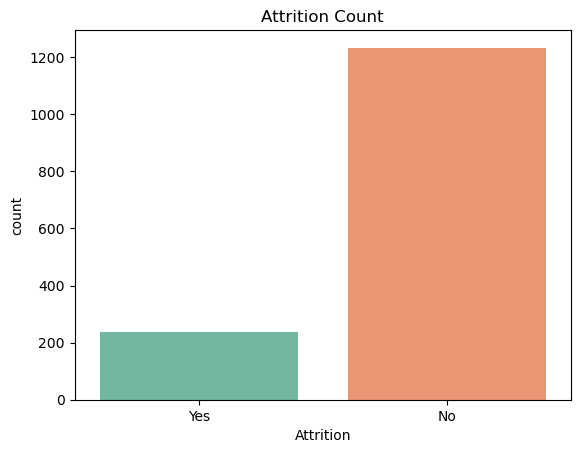

In [12]:
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title("Attrition Count")
plt.show()


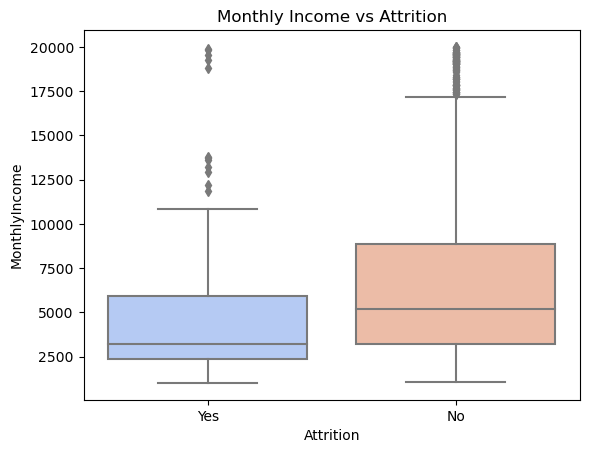

In [13]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='coolwarm')
plt.title("Monthly Income vs Attrition")
plt.show()


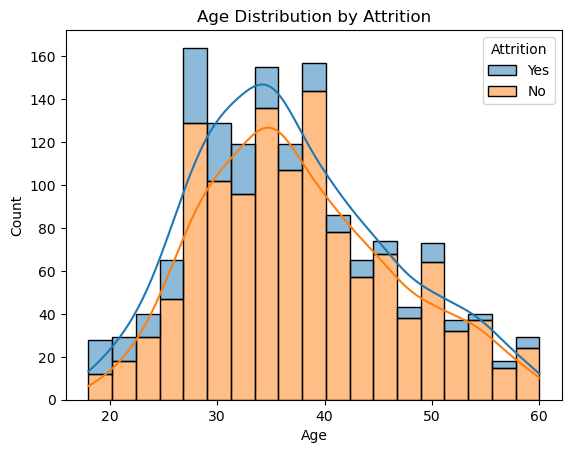

In [14]:
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, multiple="stack")
plt.title("Age Distribution by Attrition")
plt.show()


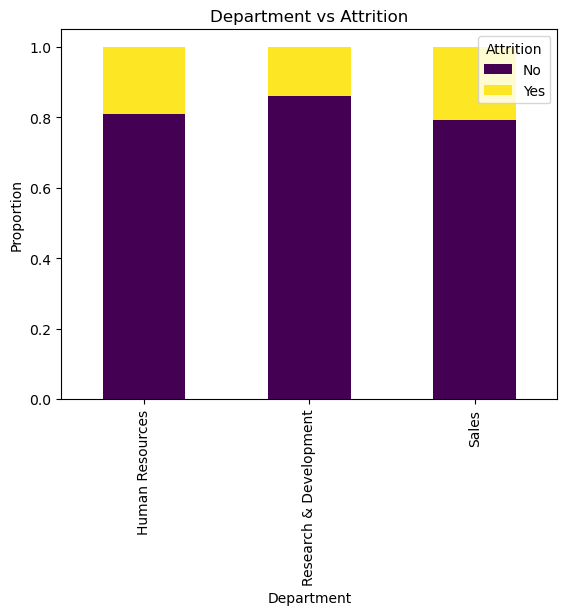

In [15]:
pd.crosstab(df['Department'], df['Attrition'], normalize='index').plot(
    kind='bar', stacked=True, colormap='viridis'
)
plt.title("Department vs Attrition")
plt.ylabel("Proportion")
plt.show()


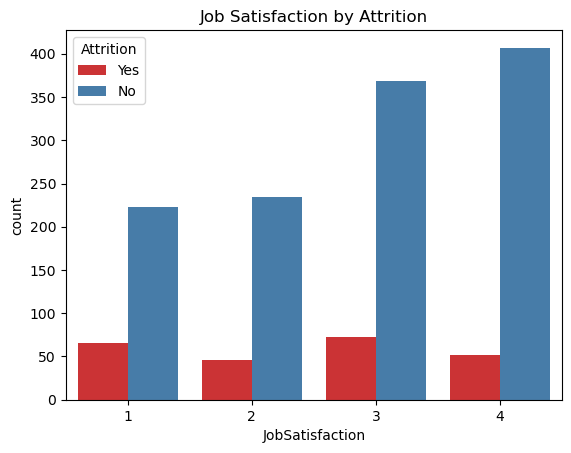

In [16]:
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='Set1')
plt.title("Job Satisfaction by Attrition")
plt.show()


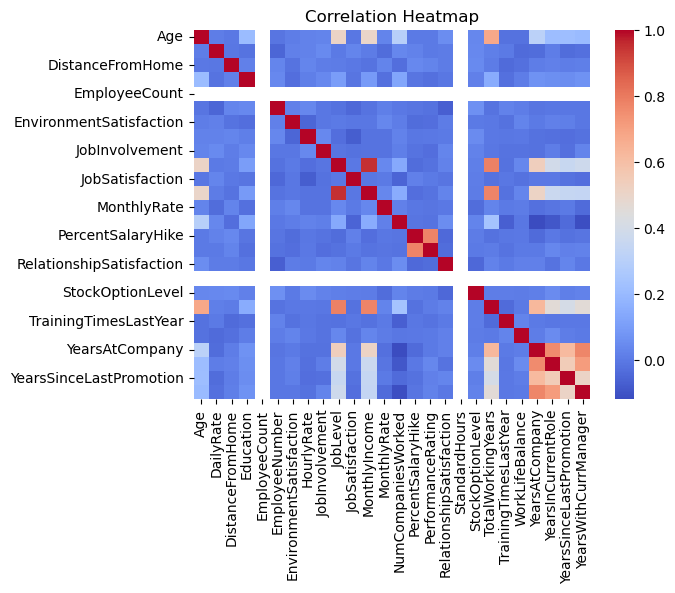

In [17]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [18]:
df_encoded = df.copy()
le = LabelEncoder()

for column in df_encoded.select_dtypes(include='object').columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])


In [19]:
X = df_encoded.drop("Attrition", axis=1)
y = df_encoded["Attrition"]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)


In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [24]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n🔍 Evaluation for {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


In [25]:
evaluate_model("Logistic Regression", y_test, y_pred_lr)



🔍 Evaluation for Logistic Regression
Accuracy: 0.891156462585034
Confusion Matrix:
 [[249   6]
 [ 26  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294



In [26]:
evaluate_model("Random Forest", y_test, y_pred_rf)



🔍 Evaluation for Random Forest
Accuracy: 0.8673469387755102
Confusion Matrix:
 [[251   4]
 [ 35   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



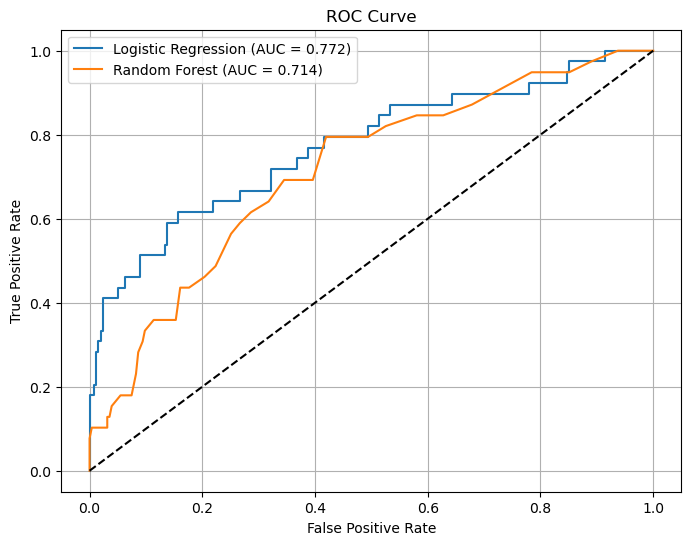

In [27]:
y_proba_lr = logreg.predict_proba(X_test_scaled)[:, 1]
y_proba_rf = rf.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %.3f)' % roc_auc_score(y_test, y_proba_lr))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %.3f)' % roc_auc_score(y_test, y_proba_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
